In [4]:

import pandas as pd


import matplotlib.pyplot as plt

In [5]:

file = '2015년_연령층별_성별_교통사고.csv'

In [6]:
accident_data = pd.read_csv(file, encoding = 'cp949')

In [7]:

accident_data

,연령층,성별,발생건수,사망자수,부상자수,중상,경상,부상신고
0,12세이하,남,482,2,516,112,249,155
1,12세이하,여,62,0,63,10,29,24
2,13-20세,남,8546,151,11995,3237,6951,1807
3,13-20세,여,513,1,822,172,574,76
4,13-20세,기타불명,43,0,44,11,23,10
5,21-30세,남,25676,534,40491,10384,27045,3062
6,21-30세,여,5265,57,8348,1916,5868,564
7,21-30세,기타불명,45,1,46,11,28,7
8,31-40세,남,29409,589,45533,11782,30695,3056
9,31-40세,여,9208,85,13967,3455,9647,865


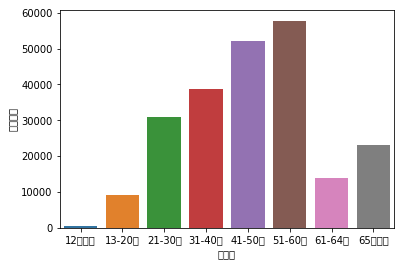

In [9]:
accident_clean = accident_data.query("성별!='기타불명'")
accident_clean = accident_clean.query("연령층!='불명'")

# 위의 두 조건을 & (and)를 활용하여 한번에 할 수도 있다. 
accident_clean = accident_data.query("성별!='기타불명' & 연령층!='불명'")

### 연령층과 발생건수만 선택하여 그려보자
연령별_발생건수 = accident_clean[['연령층', '발생건수']]
연령별_발생건수 = 연령별_발생건수.groupby(['연령층']).sum()
연령별_발생건수 = 연령별_발생건수.reset_index()

import seaborn as sns
# seanborn barplot은 기본값이 confidence interval 출력, 없애려면 ci= None 입력
sns.barplot(x='연령층', y='발생건수', data=연령별_발생건수, ci=None) 


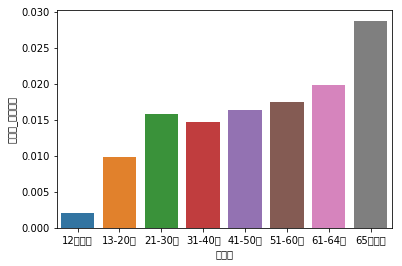

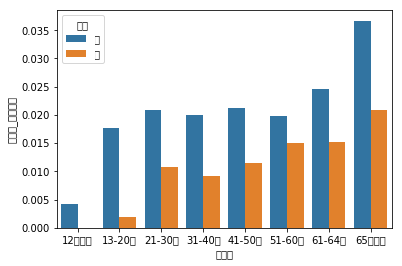

In [10]:
accident2 = accident_clean.drop('부상신고', axis=1) #axis 0은 index, 1은 컬럼
delete_row = accident_clean.drop(3,axis = 0)

# 사망율 컬럼 추가
accident2['사망율_발생건수'] = accident2['사망자수']/accident2['발생건수']
plt.figure()
sns.barplot(x='연령층', y='사망율_발생건수', data=accident2, ci=None)

# 성별을 그룹화하여 그려보자
plt.figure()
sns.barplot(x='연령층', y='사망율_발생건수', hue='성별', data=accident2, ci=None)

# csv 출력, 한글 윈도우는 cp949 인코딩 사용
accident2.to_csv('accident2.csv', encoding = 'cp949')

# 엑셀 파일 읽기
xlsxfile = '2015년_연령층별_성별_교통사고.xlsx'
xldata = pd.read_excel(xlsxfile)

### 엑셀 파일 쓰기
# 엑셀 파일 생성
xlfile = pd.ExcelWriter('accident2.xlsx', engine = 'xlsxwriter')

# 시트에 데이터 쓰기
accident2.to_excel(xlfile, sheet_name = 'accident2')

# 엑셀 파일 저장
xlfile.save()


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 15 20:07:33 2018

@author: jooho
"""

import pandas as pd

# matplotlib 한글 깨짐 방지 
import matplotlib.pyplot as plt
#from matplotlib import font_manager, rc
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)


### 파일 데이터 읽기

# 워킹 디렉토리 확인
#import os
#os.getcwd()

# 파일 경로 지정
#path = os.getcwd() #현재 working forlder에 파일이 있을 때 사용

#path = 'C:\\Users\\jooho\\Documents\\GitHub\\Hanyang201901' #직접 지정할 때
#os.chdir(path)


file = '2015년_연령층별_성별_교통사고.csv'

# 파일명과 합쳐준다. 
path_file = path + '\\' + file

# 한글 윈도우는 cp949 인코딩 사용
accident_data = pd.read_csv(path_file, encoding = 'cp949')

### 연령별 사고 발생건수를 알아보자

# 성별 중에서 기타불명을 제거해보자
accident_clean = accident_data.query("성별!='기타불명'")

# 연령이 불명인 데이터도 제거해보자
accident_clean = accident_clean.query("연령층!='불명'")

# 위의 두 조건을 & (and)를 활용하여 한번에 할 수도 있다. 
accident_clean = accident_data.query("성별!='기타불명' & 연령층!='불명'")

### 연령층과 발생건수만 선택하여 그려보자
연령별_발생건수 = accident_clean[['연령층', '발생건수']]
연령별_발생건수 = 연령별_발생건수.groupby(['연령층']).sum()
연령별_발생건수 = 연령별_발생건수.reset_index()

import seaborn as sns
# seanborn barplot은 기본값이 confidence interval 출력, 없애려면 ci= None 입력
sns.barplot(x='연령층', y='발생건수', data=연령별_발생건수, ci=None) 

### 발생건수 대비 사망자수 비율을 알아보자
# 필요없는 컬럼을 삭제해보자
accident2 = accident_clean.drop('부상신고', axis=1) #axis 0은 index, 1은 컬럼
delete_row = accident_clean.drop(3,axis = 0)

# 사망율 컬럼 추가
accident2['사망율_발생건수'] = accident2['사망자수']/accident2['발생건수']
plt.figure()
sns.barplot(x='연령층', y='사망율_발생건수', data=accident2, ci=None)

# 성별을 그룹화하여 그려보자
plt.figure()
sns.barplot(x='연령층', y='사망율_발생건수', hue='성별', data=accident2, ci=None)

# csv 출력, 한글 윈도우는 cp949 인코딩 사용
accident2.to_csv('accident2.csv', encoding = 'cp949')

# 엑셀 파일 읽기
xlsxfile = path + '\\' + '2015년_연령층별_성별_교통사고.xlsx'
xldata = pd.read_excel(xlsxfile)

### 엑셀 파일 쓰기
# 엑셀 파일 생성
xlfile = pd.ExcelWriter('accident2.xlsx', engine = 'xlsxwriter')

# 시트에 데이터 쓰기
accident2.to_excel(xlfile, sheet_name = 'accident2')

# 엑셀 파일 저장
xlfile.save()







FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/malgun.ttf'